# Assignment 1. Data Manipulation and Visualization  

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2024)*  

*For your questions refer to mehrshadtaji61@gmail.com or @m522t on Telegram*

### Description
In this homework you are supposed to get comfortable (or make sure that you are!) with the basic Python tools frequently used in data science.  

### Information  
Complete the information box below.

In [ ]:
full_name = "Parham Gilani"
student_id = "400101859"

### Import necessary packages

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ss
from statistics import median
from statistics import mean
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from scipy.stats import pearsonr
import re
import warnings
import string
from wordcloud import WordCloud

# ====================================
# feel free to import any other package
# ====================================
warnings.filterwarnings('ignore') 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [WinError 10061] No
[nltk_data]     connection could be made because the target machine
[nltk_data]     actively refused it>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10061] No connection could be made because
[nltk_data]     the target machine actively refused it>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10061]
[nltk_data]     No connection could be made because the target machine
[nltk_data]     actively refused it>


False

# 1. Let's Talk Business!

Storing customer and transaction data is crucial for e-commerce businesses as it enables them to understand and anticipate customer needs, optimize operations, and enhance the overall shopping experience. By collecting and analyzing data such as purchase history, browsing behavior, and demographic information, e-commerce platforms can personalize marketing efforts, recommend products, and improve customer retention. Additionally, transaction data helps in managing inventory, detecting fraudulent activities, and ensuring secure payment processing

This dataset contains the official transactions and customer data for a certain E-Commerce. The schema of the dataset can be shown in the following diagram.

<div style="text-align: center;">
<img src="./data/Q1/commerce_schema.png" alt="commerce-schema" width="750"/>
</div>

In this task you have to apply the following Data Wrangling pipeline:
* Load your data into `Pandas`  

* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

## 1.1 Loading Phase

Load all of the sheets in the excel file to multiple `Pandas` dataframes in the directory `data/Q1`

In [58]:
customers = pd.read_excel("data\Q1\E-commerce_data.xlsx",sheet_name="customers")
genders = pd.read_excel("data\Q1\E-commerce_data.xlsx",sheet_name="genders")
cities = pd.read_excel("data\Q1\E-commerce_data.xlsx",sheet_name="cities")
transactions = pd.read_excel("data\Q1\E-commerce_data.xlsx",sheet_name="transactions")
branches = pd.read_excel("data\Q1\E-commerce_data.xlsx",sheet_name="branches")
merchants = pd.read_excel("data\Q1\E-commerce_data.xlsx",sheet_name="merchants")

## 1.2 Cleaning Phase

Explore the following columns from your dataset:

* transactions: year  

* transactions: branch_id
  
Answer the following questions using data visualizations and manipulations. The code for this part is required alongside your explanations either in comments or markdown.  

1. What is the time range of the transactions?  
2. What is the median branch in terms of transaction count?
3. Do you see any inconsistencies? 
4. Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

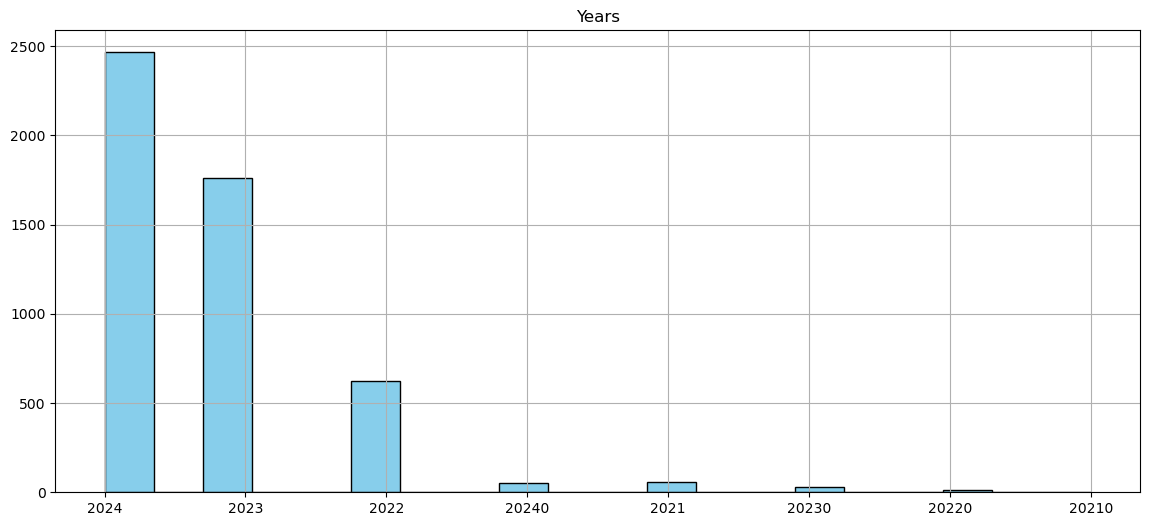

In [59]:
## part 1
branch_id = transactions["branch_id"]
years = []
for dates in transactions["transaction_date"]:
    years.append(dates.split("-")[0])

plt.figure(figsize=(14,6))
plt.hist(years,align="mid", color='skyblue', edgecolor='black', bins=20);
plt.title("Years")
plt.grid()
plt.show()
print()


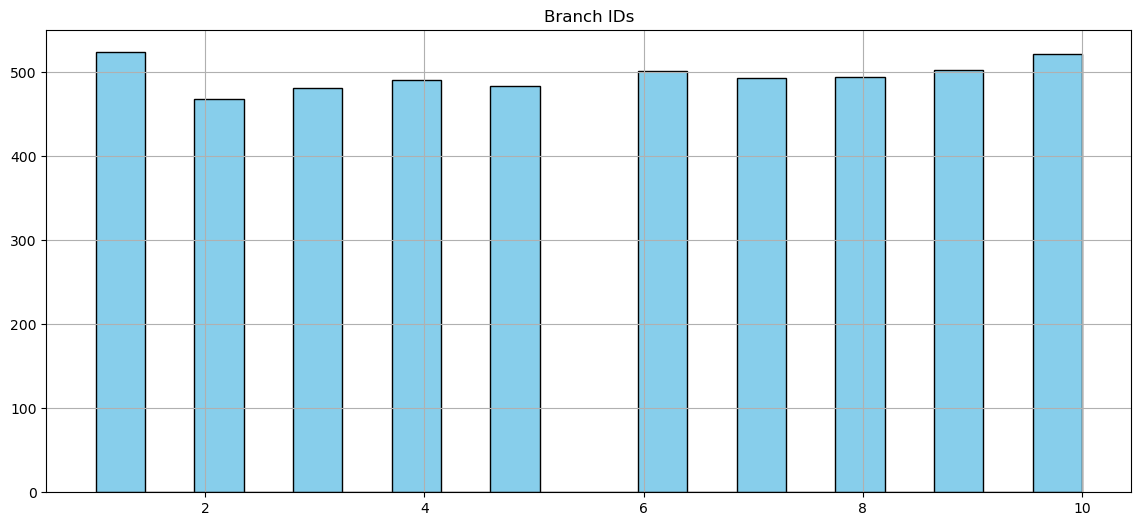

The median of branchs is 1.0 as it is visible in the histogram

AS we can see in the first plot there are several years that doesnt make any sence like 20210,20220,20230 and it seems like there is a 0 places there by mistake.


In [60]:
## part 2
plt.figure(figsize=(14,6))
plt.hist(branch_id,align="mid", color='skyblue', edgecolor='black', bins=20);
plt.title("Branch IDs")
plt.grid()
plt.show()
print("The median of branchs is",median(branch_id),"as it is visible in the histogram")

## part 3
print("\nAS we can see in the first plot there are several years that doesnt make any sence like 20210,20220,20230 and it seems like there is a 0 places there by mistake.")


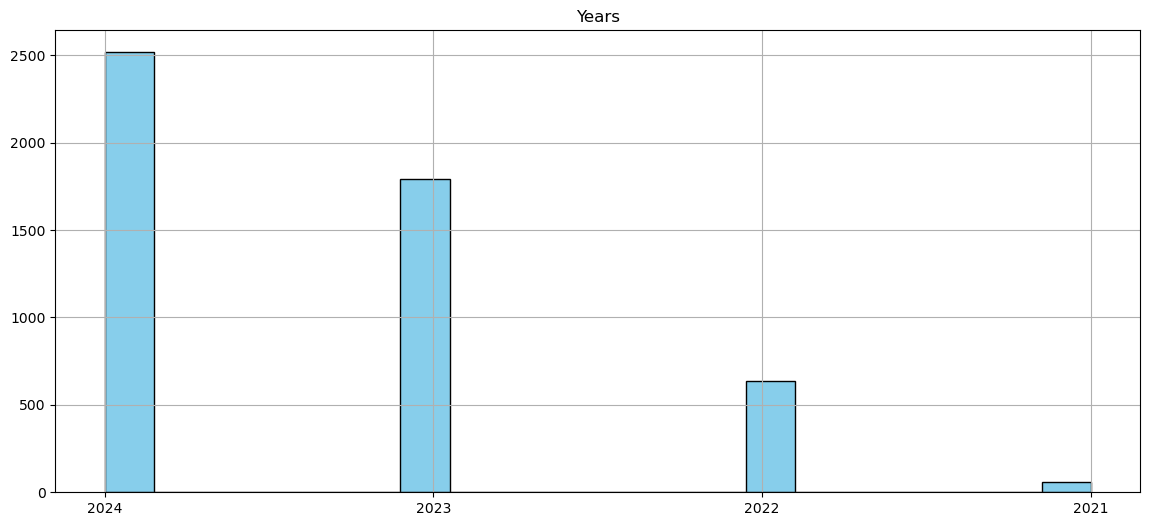

And now we can see the corrected form of the dates.


In [61]:
## part 4
new_years = []
for year in years:
    new_years.append(year[0:4])

plt.figure(figsize=(14,6))
plt.hist(new_years,align="mid", color='skyblue', edgecolor='black', bins=20);
plt.title("Years")
plt.grid()
plt.show()
print("And now we can see the corrected form of the dates.")

**Explain your approach and assumptions once this section is completed.**

In this section i have simply got the branch_ID and years of the transactions, then i have made the histogram of those and i have seen there is some abnormal years in the dates and i have seen its because there is a 0 at the end of the years by mistake and I have simply removed it.

## 1.3. Querying phase

Answer the following queries using the functionality of `Pandas`:

* List the names of the cities of customers who have spent coupons ending with a number less than 100. (*Hint: Find a smart way to distinguish which coupons contain numbers less than 100*).  

* Plot the distribution of merchants' transactions as a (horizontal) bar chart. Restrict yourself to the 5 merchants with their names in the x-axis.

* Create a line plot of the mean transaction counts in a month, through time. add an area plot on top of the line plot depicting the minimum and maximum bounds in each month.

* Repeat the previous part but categorize the dataset by transcription_status first. Are there any visible trends in the consuming patterns of subscribed vs. burned customers?

In [62]:
## part 1
specific_customers_ID = []
for i in range(0,len(transactions)):
    if int(((transactions["coupon_name"][i]).split("-"))[1]) < 100:
        specific_customers_ID.append(int(transactions["customer_id"][i]))

specific_cities_ID = []
for i in specific_customers_ID:
    specific_cities_ID.append(int(customers["city_id"][i-1]))

specific_cities_Name = []
for i in specific_cities_ID:
    if not cities["city_name"][i-1] in specific_cities_Name:
        specific_cities_Name.append(cities["city_name"][i-1])

print(specific_cities_Name,"\n")


['Alexandria', 'El-Mahalla El-Kubra', 'Sohag', 'Damietta', 'Tanta', 'Cairo', 'Beni Suef', 'Fayyum', 'Shubra El-Kheima', 'Qena', 'Mansoura', 'Minya', 'Damanhur', 'Asyut', 'Ismailia', 'Giza', 'Suez', 'Aswan', 'Zagazig', 'Port Said'] 



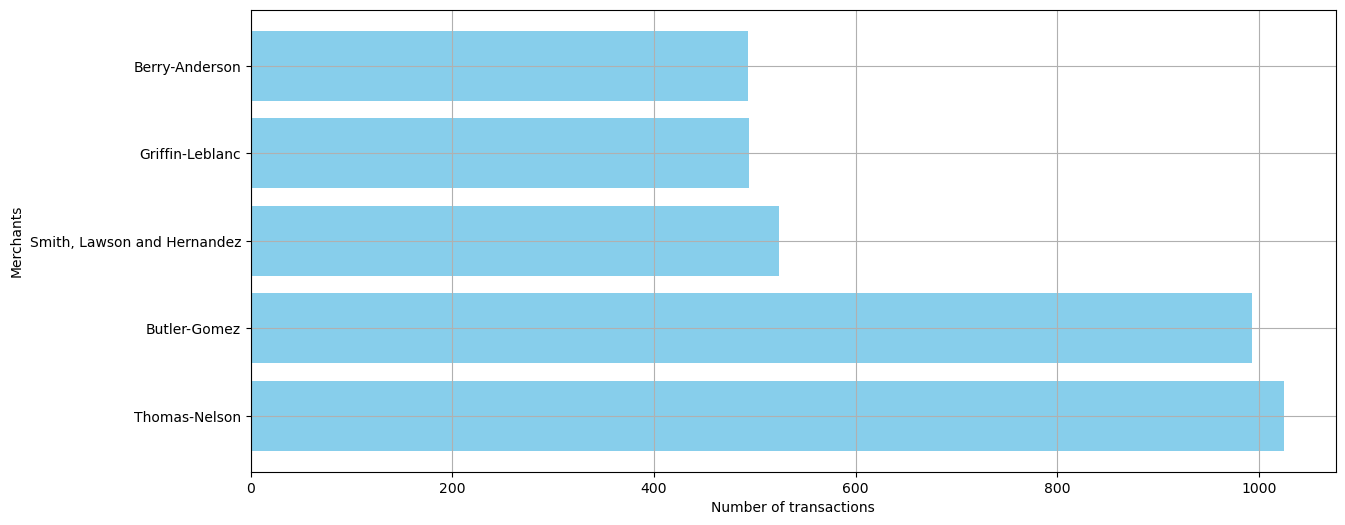

In [63]:
## part 2
branch_IDs_of_transactions = []
for i in range(0,len(branches["branch_id"])):
    branch_IDs_of_transactions.append(0)

for i in range(0,len(transactions["branch_id"])):
    if pd.isna(transactions["branch_id"][i]):
        continue
    else:
        branch_IDs_of_transactions[int(transactions["branch_id"][i])-1] += 1

IDs = []
Numbers = []
for i in range(0,len(branch_IDs_of_transactions)):
    if branches["merchant_id"][i] not in IDs:
        IDs.append(branches["merchant_id"][i])
        Numbers.append(branch_IDs_of_transactions[i])
    else:
        index = IDs.index(branches["merchant_id"][i])
        Numbers[index] += branch_IDs_of_transactions[i]

names = []
for i in IDs:
    names.append(merchants["merchant_name"][i-1])

largest_5 = sorted(enumerate(Numbers), key=lambda x: x[1], reverse=True)[:5]
indices, max_numbers = zip(*largest_5)

new_names = []
for i in indices:
    new_names.append(names[i])

plt.figure(figsize=(14,6))
plt.barh(new_names, max_numbers, color='skyblue')
plt.grid()
plt.xlabel('Number of transactions')
plt.ylabel('Merchants')
plt.show()


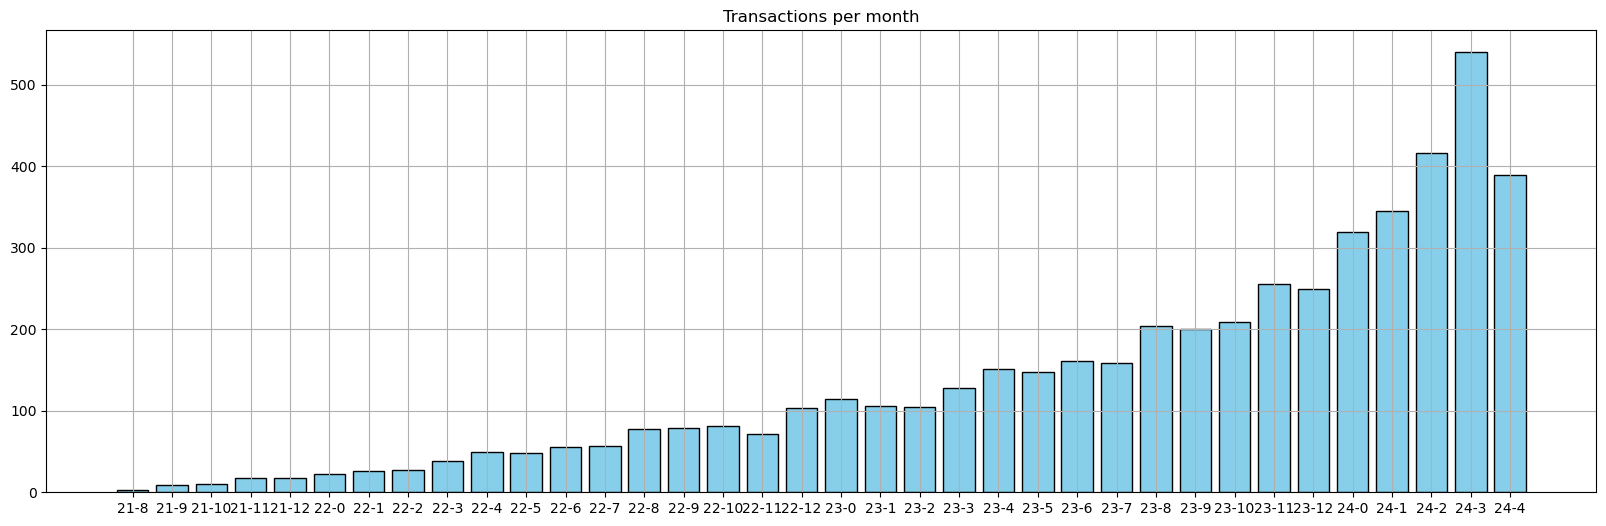

In [64]:
## part 3
dates = []
transaction_num = []
for i in range(21,25):
    for j in range(0,13):
        dates.append((str(i)+"-"+str(j)))
        transaction_num.append(0)
            
for date in transactions["transaction_date"]:
    year = date.split("-")[0]
    year = year[0:4]
    month = date.split("-")[1]
    transaction_num[12 * (int(year) - 2021) + int(month)] += 1

new_dates = []
new_transaction_num = []
for i in range(0,len(transaction_num)):
    if transaction_num[i] != 0:
        new_dates.append(dates[i])
        new_transaction_num.append(transaction_num[i])

plt.figure(figsize=(20,6))
plt.bar(new_dates, new_transaction_num, color='skyblue', edgecolor='black')
plt.title("Transactions per month")
plt.grid()
plt.show()


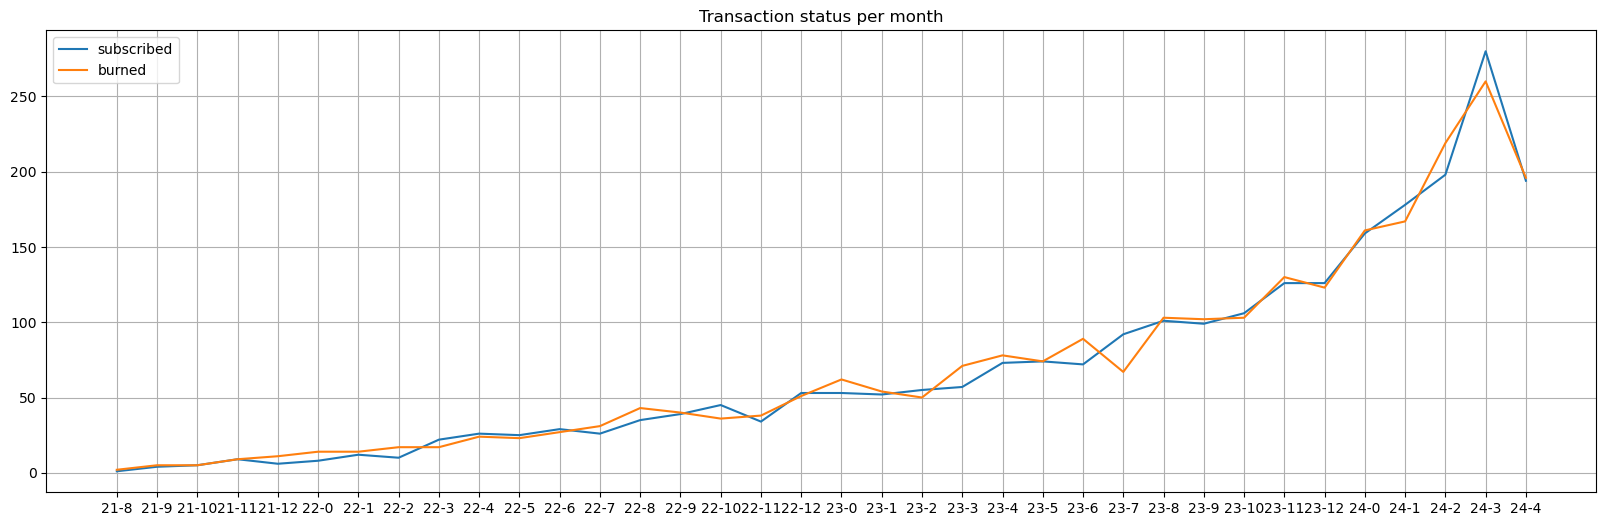

In [65]:
## part 4
dates = []
subs_num = []
burns_num = []
for i in range(21,25):
    for j in range(0,13):
        dates.append((str(i)+"-"+str(j)))
        subs_num.append(0)
        burns_num.append(0)
  
for i in range(0,len(transactions["transaction_date"])):
    year = transactions["transaction_date"][i].split("-")[0]
    year = year[0:4]
    month = transactions["transaction_date"][i].split("-")[1]
    if transactions["transaction_status"][i] == "subscribed":
        subs_num[12 * (int(year) - 2021) + int(month)] += 1
    else:
        burns_num[12 * (int(year) - 2021) + int(month)] += 1

new_dates = []
new_subs_num = []
new_burns_num = []
for i in range(0,len(dates)):
    if subs_num[i] != 0 or burns_num[i] != 0:
        new_dates.append(dates[i])
        new_subs_num.append(subs_num[i])
        new_burns_num.append(burns_num[i])

plt.figure(figsize=(20,6))
plt.plot(new_dates, new_subs_num)
plt.plot(new_dates, new_burns_num)
plt.title("Transaction status per month")
plt.legend(["subscribed","burned"])
plt.grid()
plt.show()

**Explain your approach and assumptions once this section is completed.**

In this section, for the first part i have found the coupons on which their dates is less than 100 and then I have found this is whose coupon and then found the city of the customer.
For the second part, I have simply found the merchants transactions and then simply plot the 5 greatest of them(merchant no 13 work with both branch no 9 and 10).
For the third part, I have simply found the number of transactions had been made in specific dates and I have removed the dates with no transactions available and then plot them.
For the fourh part, I have copied my last part but in exchange of measuring the number of transactions, I have measured the transactions status.

# 2. Canadian Cheese Directory!

The database of Canadian cheeses made from cow, goat, sheep or buffalo milk has been provided.

In this question you will again perform data wrangling and interpretation.

## 2.1 Loading Phase 

Load the csv file into a `DataFrame`

In [49]:
cheese_data = pd.read_csv("data\Q2\cheese_data.csv")

## 2.2 Cleaning Phase 

Perform the following actions on the dataset.

1. Describe the type and the value range of each attribute.  
2. Indicate and transform the attributes that are `Categorical`.
3. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)?
4. What are the possible pitfalls of having such columns?

Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [50]:
## part 1
print("Part 1 : ")
print(cheese_data.dtypes)
#cheese_data.describe()
cheese_data.describe(include="all")


Part 1 : 
Unnamed: 0                int64
CheeseId                  int64
ManufacturerProvCode     object
ManufacturingTypeEn      object
MoisturePercent         float64
FlavourEn                object
CharacteristicsEn        object
Organic                   int64
CategoryTypeEn           object
MilkTypeEn               object
MilkTreatmentTypeEn      object
RindTypeEn               object
CheeseName               object
FatLevel                 object
FatIndex                  int64
dtype: object


,Unnamed: 0,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel,FatIndex
count,1042.000000,1042.000000,1042,1042,1028.000000,801,643,1042.000000,1019,1041,977,721,1042,1042,1042.000000
unique,NaN,NaN,10,3,NaN,635,535,NaN,6,8,3,4,1038,2,NaN
top,NaN,NaN,QC,Industrial,NaN,Mild,Creamy,NaN,Firm Cheese,Cow,Pasteurized,No Rind,Ménestrel (Le),lower fat,NaN
freq,NaN,NaN,796,455,NaN,59,19,NaN,349,743,800,404,2,684,NaN
mean,520.500000,1560.633397,NaN,NaN,47.069747,NaN,NaN,0.095010,NaN,NaN,NaN,NaN,NaN,NaN,0.343570
std,300.943793,451.811164,NaN,NaN,9.592647,NaN,NaN,0.293369,NaN,NaN,NaN,NaN,NaN,NaN,0.475128
min,0.000000,228.000000,NaN,NaN,12.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,260.250000,1280.250000,NaN,NaN,40.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,520.500000,1548.500000,NaN,NaN,46.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,780.750000,1901.750000,NaN,NaN,52.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [51]:
## part 2
def print_att (cheese_data , name):
    ranges = []
    for att in cheese_data[name]:
        if pd.isna(att):
            continue
        if att not in ranges:
            ranges.append(att)
    print(name," : ",ranges)

print("Part 2 : \n")

categorical_columns = ['ManufacturerProvCode', 'ManufacturingTypeEn', 'FlavourEn', 'CharacteristicsEn', 'CategoryTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn', 'RindTypeEn', 'CheeseName', 'FatLevel']
print("categorical_columns : ",categorical_columns,"\n")
for name in categorical_columns:
    cheese_data[name] = cheese_data[name].astype('category')
print(cheese_data.dtypes)

Part 2 : 

categorical_columns :  ['ManufacturerProvCode', 'ManufacturingTypeEn', 'FlavourEn', 'CharacteristicsEn', 'CategoryTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn', 'RindTypeEn', 'CheeseName', 'FatLevel'] 

Unnamed: 0                 int64
CheeseId                   int64
ManufacturerProvCode    category
ManufacturingTypeEn     category
MoisturePercent          float64
FlavourEn               category
CharacteristicsEn       category
Organic                    int64
CategoryTypeEn          category
MilkTypeEn              category
MilkTreatmentTypeEn     category
RindTypeEn              category
CheeseName              category
FatLevel                category
FatIndex                   int64
dtype: object


In [52]:
## part 3
print("Part 3 : \n")
print(cheese_data[['CheeseId', 'FatLevel', 'FatIndex']].drop_duplicates())
print(cheese_data[['FatLevel', 'FatIndex']].drop_duplicates())

Part 3 : 

      CheeseId    FatLevel  FatIndex
0          228   lower fat         0
1          242   lower fat         0
2          301   lower fat         0
3          303   lower fat         0
4          319   lower fat         0
...        ...         ...       ...
1037      2387  higher fat         1
1038      2388   lower fat         0
1039      2389  higher fat         1
1040      2390  higher fat         1
1041      2391  higher fat         1

[1042 rows x 3 columns]
      FatLevel  FatIndex
0    lower fat         0
11  higher fat         1


In [53]:
## part 4
print("Part 4 : \n")
new_cheese_data = cheese_data.drop(columns=['FatIndex'])
drop_falls = cheese_data[['CheeseId', 'FatLevel', 'FatIndex']].drop_duplicates()

print("\n",new_cheese_data.dtypes)
print(f"\ncheese_data shape: {cheese_data.shape}")
print(f"\nnew_cheese_data shape: {new_cheese_data.shape}")
print(f"\ndrop_falls shape: {drop_falls.shape}")


Part 4 : 


 Unnamed: 0                 int64
CheeseId                   int64
ManufacturerProvCode    category
ManufacturingTypeEn     category
MoisturePercent          float64
FlavourEn               category
CharacteristicsEn       category
Organic                    int64
CategoryTypeEn          category
MilkTypeEn              category
MilkTreatmentTypeEn     category
RindTypeEn              category
CheeseName              category
FatLevel                category
dtype: object

cheese_data shape: (1042, 15)

new_cheese_data shape: (1042, 14)

drop_falls shape: (1042, 3)


**Explain your approach and assumptions once this section is completed.**

In this part I have simply viewed the dataFrame and then specified those attributes that can be categorized then I have found that there is a correlation between FatIndex and FatLevel and then removed it from the dataFrame.

## 2.3 Querying Phase

Answer the following queries using the functionality of `Pandas`.

* Plot the **proportion** of **ManufacturingTypeEn**, **MoisturePercent**, **CategoryTypeEn**, **MilkTypeEn** columns in four subplots using pie diagrams.

* Categorize the dataframe by the **FatIndex**. Calculate the proportion of each FatIndex in the previous columns (ManufacturingTypeEn, MoisturePercent, CategoryTypeEn, MilkTypeEn) and present your results in a **stacked bar chart**.

* Separate the MoisturePercent values into two intervals that have (approximately) the same number of cheese products in the dataset. Categorize the dataset based on MoistureIndex, FatIndex, ManufacturingTypeEn, MoisturePercent, CategoryTypeEn, MilkTypeEn and calculate the proportions of each category. Represent your results in a separate `DataFrame`.

* Is there any row that is slightly more popular than the others? Do you see any correlation between the cheese attributes and their popularity?


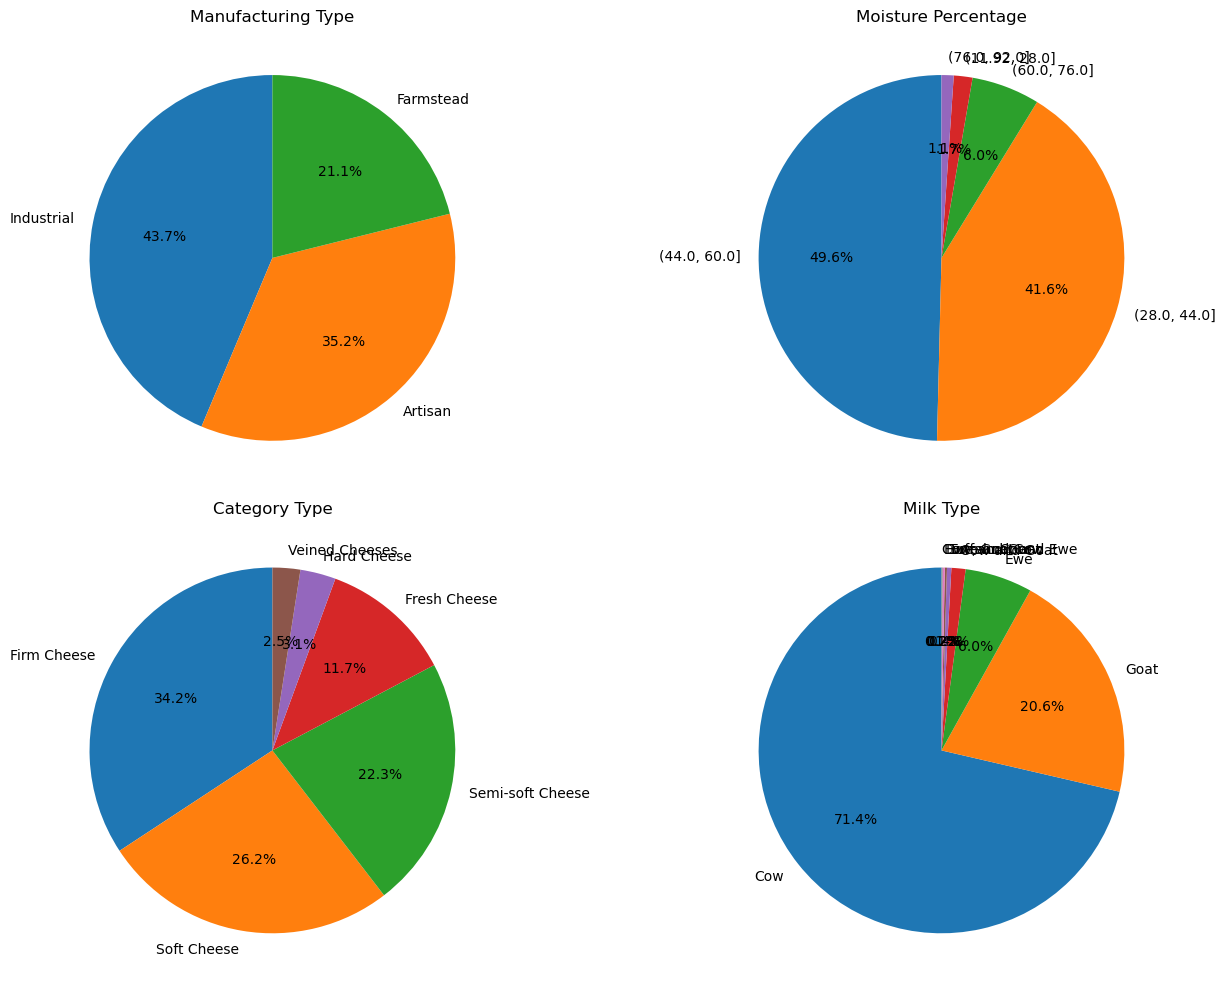

In [54]:
## part 1
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Pie chart for Manufacturing Type
cheese_data["ManufacturingTypeEn"].value_counts().plot.pie(
    autopct="%.1f%%", 
    ax=axs[0, 0], 
    title="Manufacturing Type",
    startangle=90
)
axs[0, 0].set_ylabel('')  # Remove the default y-label

# Pie chart for Moisture Percentage
moisture_bins = pd.cut(cheese_data["MoisturePercent"], bins=5)
moisture_bins.value_counts().plot.pie(
    autopct="%.1f%%", 
    ax=axs[0, 1], 
    title="Moisture Percentage",
    startangle=90
)
axs[0, 1].set_ylabel('')  # Remove the default y-label

# Pie chart for Category Type
cheese_data["CategoryTypeEn"].value_counts().plot.pie(
    autopct="%.1f%%", 
    ax=axs[1, 0], 
    title="Category Type",
    startangle=90
)
axs[1, 0].set_ylabel('')  # Remove the default y-label

# Pie chart for Milk Type
cheese_data["MilkTypeEn"].value_counts().plot.pie(
    autopct="%.1f%%", 
    ax=axs[1, 1], 
    title="Milk Type",
    startangle=90
)
axs[1, 1].set_ylabel('')  # Remove the default y-label

plt.tight_layout()

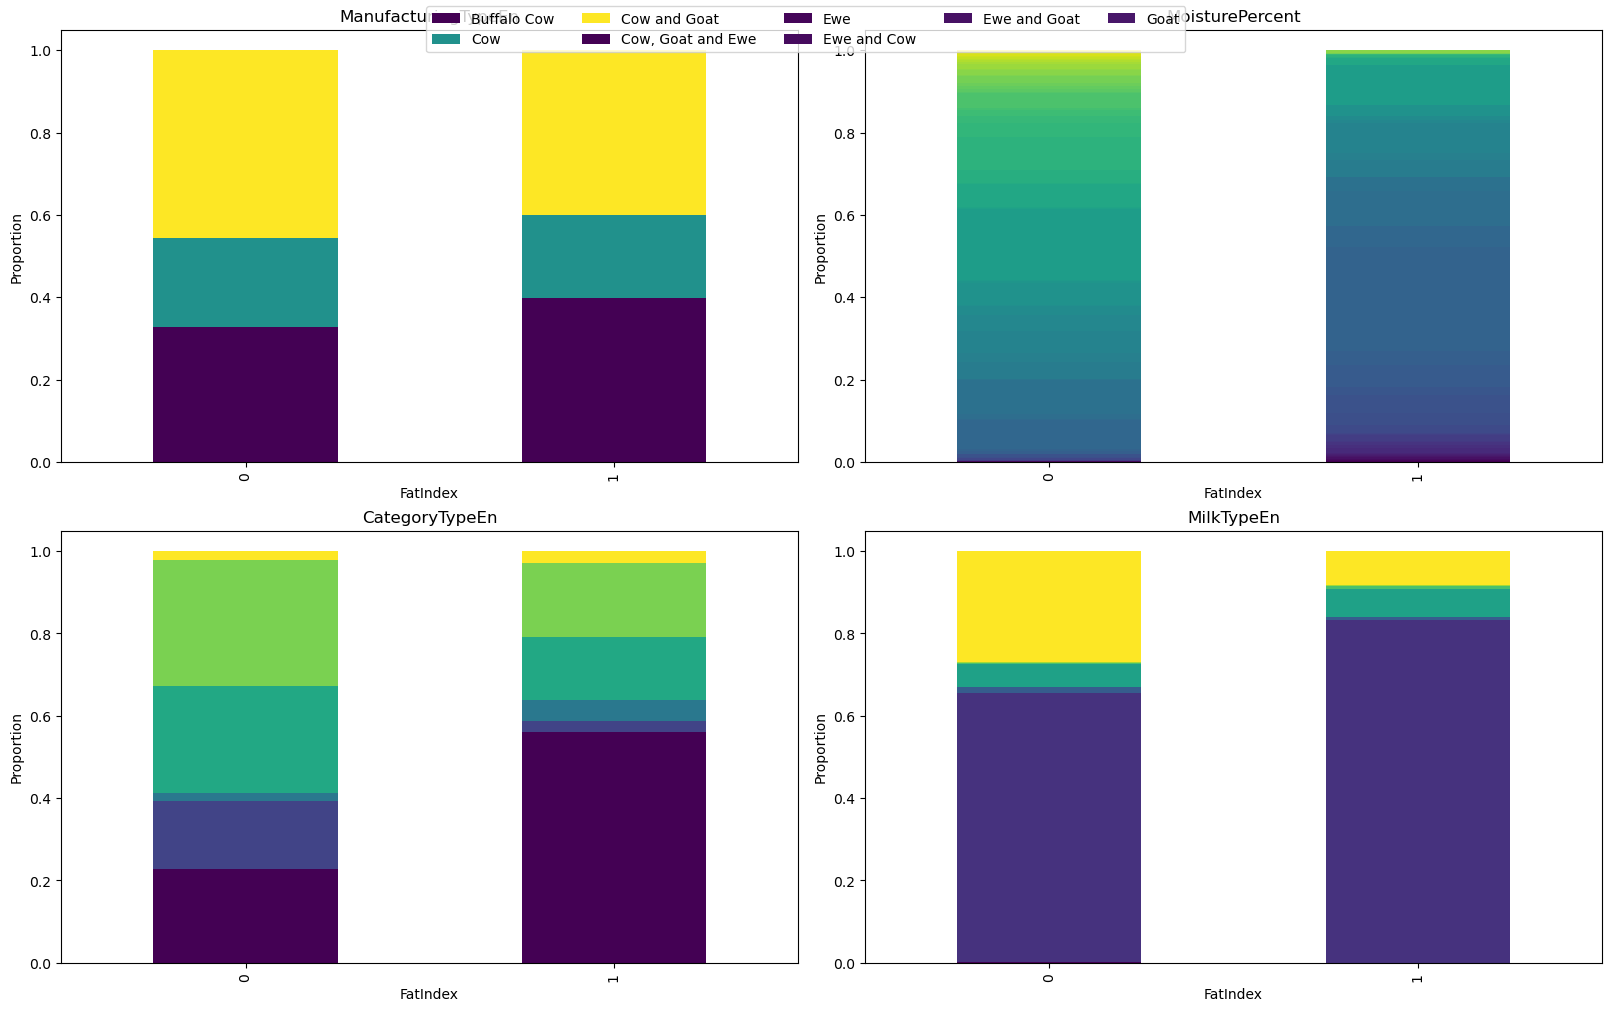

In [55]:
## part 2
# Assuming cheese_data is already loaded as a pandas DataFrame
# Group by 'FatIndex' and calculate the proportion in the other columns
proportions = {}

# Iterate over the specified columns and calculate the normalized value counts
for col in ['ManufacturingTypeEn', 'MoisturePercent', 'CategoryTypeEn', 'MilkTypeEn']:
    proportions[col] = cheese_data.groupby('FatIndex')[col].value_counts(normalize=True).unstack()

# Plot stacked bar charts for each column
fig, axes = plt.subplots(2, 2, figsize=(16, 10), constrained_layout=True)

for ax, (col, prop_df) in zip(axes.flatten(), proportions.items()):
    prop_df.plot(kind='bar', stacked=True, ax=ax, cmap='viridis', legend=False)
    ax.set_title(f'{col}')
    ax.set_xlabel('FatIndex')
    ax.set_ylabel('Proportion')

# Add a general legend
fig.legend(prop_df.columns, loc='upper center', ncol=5)
plt.show()

In [56]:
## part 3

# Step 1: Split 'MoisturePercent' into two intervals with approximately equal number of cheese products
# Use qcut to create two bins with the same number of observations
cheese_data['MoistureIndex'] = pd.qcut(cheese_data['MoisturePercent'], q=2, labels=['Low', 'High'])

# Step 2: Categorize the dataset by MoistureIndex, FatIndex, ManufacturingTypeEn, MoisturePercent, CategoryTypeEn, MilkTypeEn
# Group by the specified columns and calculate the proportions
grouped_data = cheese_data.groupby(['MoistureIndex', 'FatIndex', 'ManufacturingTypeEn', 'MoisturePercent', 'CategoryTypeEn', 'MilkTypeEn']).size()

# Step 3: Convert to proportions by dividing by the total number of cheese products
proportions = grouped_data / len(cheese_data)

# Step 4: Convert the Series to a DataFrame for better visualization
proportions_df = proportions.reset_index(name='Proportion')

# Display the resulting DataFrame
proportions_df

,MoistureIndex,FatIndex,ManufacturingTypeEn,MoisturePercent,CategoryTypeEn,MilkTypeEn,Proportion
0,Low,0,Artisan,12.0,Firm Cheese,Buffalo Cow,0.0
1,Low,0,Artisan,12.0,Firm Cheese,Cow,0.0
2,Low,0,Artisan,12.0,Firm Cheese,Cow and Goat,0.0
3,Low,0,Artisan,12.0,Firm Cheese,"Cow, Goat and Ewe",0.0
4,Low,0,Artisan,12.0,Firm Cheese,Ewe,0.0
...,...,...,...,...,...,...,...
39163,High,1,Industrial,92.0,Veined Cheeses,"Cow, Goat and Ewe",0.0
39164,High,1,Industrial,92.0,Veined Cheeses,Ewe,0.0
39165,High,1,Industrial,92.0,Veined Cheeses,Ewe and Cow,0.0
39166,High,1,Industrial,92.0,Veined Cheeses,Ewe and Goat,0.0


In [57]:
## part 4

most_popular = proportions_df[proportions_df['Proportion'] == proportions_df['Proportion'].max()]
print("Most popular row(s):")
print(most_popular)

correlations = cheese_data.corr()
print("\nCorrelation Matrix:")
print(correlations)

Most popular row(s):
      MoistureIndex  FatIndex ManufacturingTypeEn  MoisturePercent  \
17329           Low         1          Industrial             39.0   

      CategoryTypeEn MilkTypeEn  Proportion  
17329    Firm Cheese        Cow    0.042226  

Correlation Matrix:
                 Unnamed: 0  CheeseId  MoisturePercent   Organic  FatIndex
Unnamed: 0         1.000000  0.980996        -0.015327 -0.030536 -0.005549
CheeseId           0.980996  1.000000        -0.009948 -0.037155 -0.008712
MoisturePercent   -0.015327 -0.009948         1.000000 -0.114607 -0.495421
Organic           -0.030536 -0.037155        -0.114607  1.000000  0.082607
FatIndex          -0.005549 -0.008712        -0.495421  0.082607  1.000000


**Explain your approach and assumptions once this section is completed.**

In this section, I have simply ploted the proportion of those following attributes using pie plot.
Then I have simply categorized the dataframe and ploted the proportion of those attributes to declare what are those attribute proportion came from.
In the third part I have just simply done what was told me to do.
In the 4'th I have just printed the correlation of the dataframe.

# 3. Business Analyst Job Listings  

## 3.1 Loading Phase

As we will learn further in the course, a considerable source of data is free internet information which is crawled!

4092 business analyst job listings scraped from glassdoor are provided at `data/Q3`. Load the data in a `DataFrame`

In [37]:
business_analyst_data = pd.read_csv("data\Q3\BusinessAnalyst.csv")
business_analyst_data

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,NaN,NaN
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,NaN,NaN
4089,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1,NaN,NaN
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1,NaN,NaN


## 3.2 Cleaning Phase

Perform the following actions on the dataset.

1. Describe the type and the value range of each attribute.  
2. Indicate and transform the attributes that are `Categorical`.
3. Replace **Salary Estimate** column with expected salary.
4. Explore lower and upper bounds of **Ratings** column. Fix any inconsitensies.
5. Provide a numerical column for expected company size.

In [38]:
## part 1
print(business_analyst_data.dtypes,"\n")
print(business_analyst_data.describe(include='all'))

Unnamed: 0           object
index                object
Job Title            object
Salary Estimate      object
Job Description      object
Rating               object
Company Name         object
Location             object
Headquarters         object
Size                 object
Founded              object
Type of ownership    object
Industry             object
Sector               object
Revenue              object
Competitors          object
Easy Apply           object
dtype: object 

              Unnamed: 0                       index         Job Title  \
count               4092                        4092              4092   
unique              3962                        3706              2210   
top     Business Analyst  $35K-$65K (Glassdoor est.)  Business Analyst   
freq                  16                          30               502   

                   Salary Estimate Job Description            Rating  \
count                         4092            4092              4

In [39]:
# part 2
categorical_columns = ['Job Title', 'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue']

for col in categorical_columns:
    business_analyst_data[col] = business_analyst_data[col].astype('category')

# Verify the transformation
business_analyst_data.dtypes


Unnamed: 0             object
index                  object
Job Title            category
Salary Estimate        object
Job Description        object
Rating                 object
Company Name         category
Location             category
Headquarters         category
Size                 category
Founded                object
Type of ownership    category
Industry             category
Sector               category
Revenue              category
Competitors            object
Easy Apply             object
dtype: object

In [40]:
## part 3
business_analyst_data.rename(columns={'Salary Estimate': 'Expected Salary'}, inplace=True)
business_analyst_data.head()

,Unnamed: 0,index,Job Title,Expected Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True


In [41]:
## part 4

for col in categorical_columns:
    business_analyst_data[col] = business_analyst_data[col].astype('object')

business_analyst_data["Easy Apply"][3692:] = business_analyst_data["Revenue"][3692:]
business_analyst_data["Competitors"][3692:] = business_analyst_data["Sector"][3692:]
business_analyst_data["Revenue"][3692:] = business_analyst_data["Industry"][3692:].astype(business_analyst_data["Revenue"].dtype)
business_analyst_data["Sector"][3692:] = business_analyst_data["Type of ownership"][3692:].astype(business_analyst_data["Sector"].dtype)
business_analyst_data["Industry"][3692:] = business_analyst_data["Founded"][3692:].astype(business_analyst_data["Industry"].dtype)
business_analyst_data["Type of ownership"][3692:] = business_analyst_data["Size"][3692:].astype(business_analyst_data["Type of ownership"].dtype)
business_analyst_data["Founded"][3692:] = business_analyst_data["Headquarters"][3692:]
business_analyst_data["Size"][3692:] = business_analyst_data["Location"][3692:].astype(business_analyst_data["Size"].dtype)
business_analyst_data["Headquarters"][3692:] = business_analyst_data["Company Name"][3692:].astype(business_analyst_data["Headquarters"].dtype)
business_analyst_data.loc[3692:, "Location"] = business_analyst_data.loc[3692:, "Rating"].astype(business_analyst_data["Location"].dtype)
business_analyst_data["Company Name"][3692:] = business_analyst_data["Job Description"][3692:].astype(business_analyst_data["Company Name"].dtype)
business_analyst_data["Rating"][3692:] = business_analyst_data["Expected Salary"][3692:].astype(business_analyst_data["Rating"].dtype)
business_analyst_data["Job Description"][3692:] = business_analyst_data["Job Title"][3692:]
business_analyst_data["Expected Salary"][3692:] = business_analyst_data["index"][3692:]
business_analyst_data["Job Title"][3692:] = business_analyst_data["Unnamed: 0"][3692:].astype(business_analyst_data["Job Title"].dtype)
for i in range(3692,4094):
    business_analyst_data["index"][i] = i + 4400 - 3692
    business_analyst_data["Unnamed: 0"][i] = i

business_analyst_data["Rating"] = business_analyst_data["Rating"].astype('object')
for col in categorical_columns:
    business_analyst_data[col] = business_analyst_data[col].astype('category')

business_analyst_data


,Unnamed: 0,index,Job Title,Expected Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,4087,4795,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1
4088,4088,4796,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
4089,4089,4797,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1
4090,4090,4798,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1


In [42]:
## part 4 - countinue

print(business_analyst_data.dtypes)

print("\nUnique values in Rating:")
business_analyst_data['Rating'] = pd.to_numeric(business_analyst_data['Rating'], errors='coerce')
print(business_analyst_data['Rating'].unique()) # Explore unique values

min_rating = business_analyst_data['Rating'].min()
max_rating = business_analyst_data['Rating'].max()

print(f"\nMinimum Rating: {min_rating}")
print(f"\nMaximum Rating: {max_rating}")


Unnamed: 0             object
index                  object
Job Title            category
Expected Salary        object
Job Description        object
Rating                 object
Company Name         category
Location             category
Headquarters         category
Size                 category
Founded                object
Type of ownership    category
Industry             category
Sector               category
Revenue              category
Competitors            object
Easy Apply             object
dtype: object

Unique values in Rating:
[ 3.9  3.8  3.6  3.4  4.2  4.4  4.1  3.1  3.7  4.7  4.   5.   3.2  3.5
  4.8  4.3  3.   4.5  3.3  2.7  2.8 -1.   4.6  2.6  2.9  1.   2.5  2.
  4.9  2.2  2.3  2.4  1.7  2.1  1.9]

Minimum Rating: -1.0

Maximum Rating: 5.0


In [43]:
## part 5
# approximate median sizes for each range
mapping_size = {
    '1 to 50 employees': 25,
    '51 to 200 employees': 125,
    '201 to 500 employees': 350,
    '501 to 1000 employees': 750,
    '1001 to 5000 employees': 3000,
    '5001 to 10000 employees': 7500,
    '10000+ employees': 15000,
    'Unknown': None
}

business_analyst_data['Company Size Numeric'] = business_analyst_data['Size'].map(mapping_size)

business_analyst_data

,Unnamed: 0,index,Job Title,Expected Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Company Size Numeric
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,15000.0
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,25.0
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,750.0
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,15000.0
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,4087,4795,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,15000.0
4088,4088,4796,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,750.0
4089,4089,4797,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1,15000.0
4090,4090,4798,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1,3000.0


**Explain your approach and assumptions once this section is completed.**

In this section I have simply showed the dataframe and then specified what attributes are able to be categorized.
Moreover I have replaced the part 3 which was renaming a column in the dataframe and specifying the rating values in the dataframe and mapping the company sizes.

## 3.3 Querying Phase 

Answer the following queries using the functionality of `Pandas`.

1. Provide a pie chart of the job titles. What are the most two popular positions?
2. Consider three variables in one's interest in a job position : Salary, Size of the company and the city. Create 3 scatter plots of peoples' ratings vs. these three variables.
3. Is there any linear correlation evident in either of the plots? Configure your answers using `Scipy.stats`
4. Justify the following claim : "Higher salary causes more satisfaction towards the job".
5. Extract each and every word out of Job Description. Append all of the words and filter them in order to keep the adjectives (Hint: You may perform this filtering using the English adjective corpus provided at `data/Q3`).
6. Create a wordcloud image out of the filtered words (`pip install wordcloud`). What are the main capabilities one must posses in order to hold an Analyst position in the US?

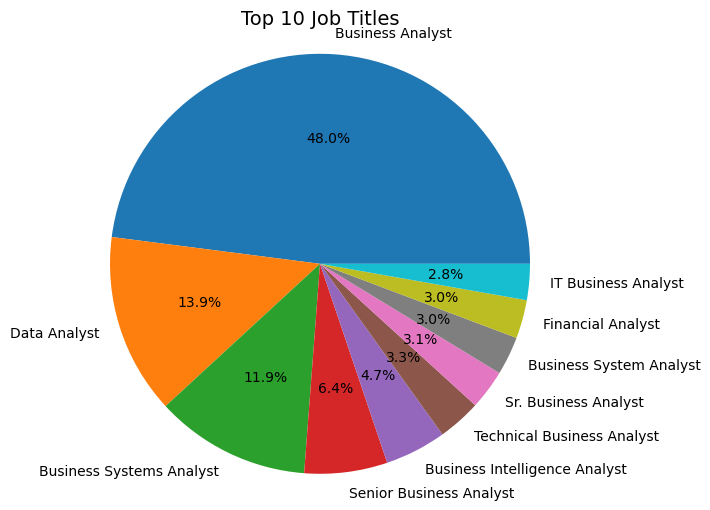

In [44]:
## part 1

# Count job titles and get the top 5
top_10_job_titles = business_analyst_data['Job Title'].value_counts().nlargest(10)

# Plot the pie chart
plt.figure(figsize=(8, 6))  # Set figure size
top_10_job_titles.plot(
    kind='pie',               # Specify the chart type
    autopct='%1.1f%%'         # Display percentages with 1 decimal place
)

# Add title and adjust layout
plt.title('Top 10 Job Titles', fontsize=14)
plt.ylabel('')  # Remove y-axis label for cleaner look
plt.axis('equal')  # Ensure pie chart is circular

# Display the chart
plt.show()

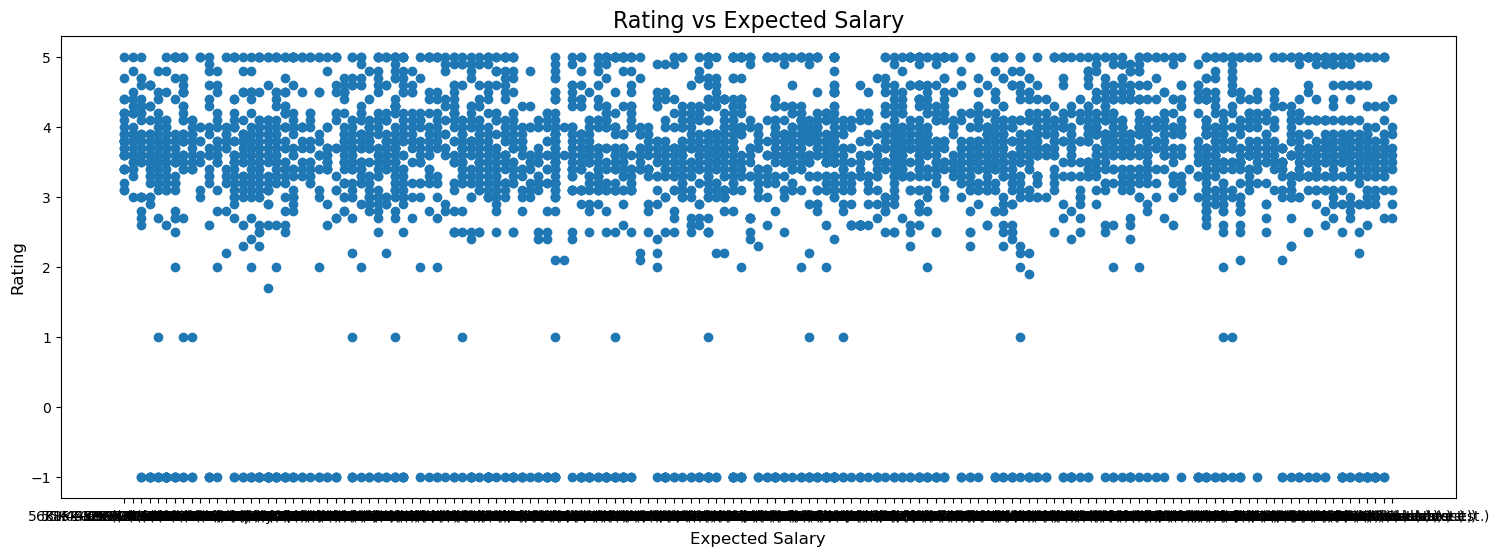

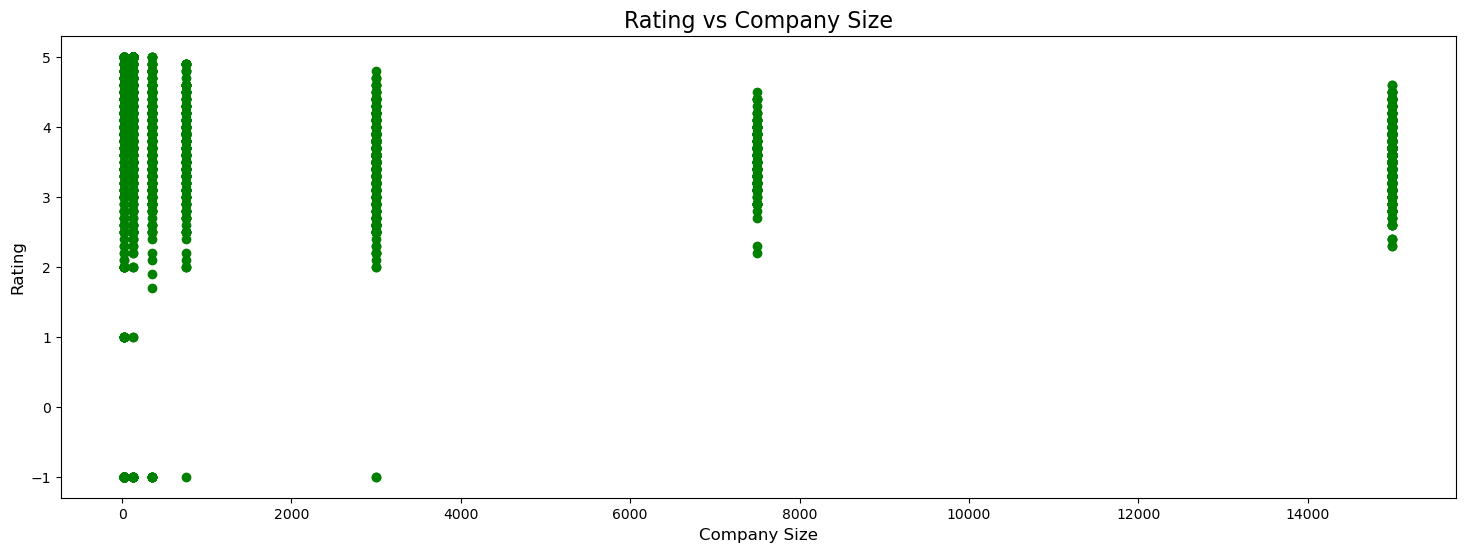

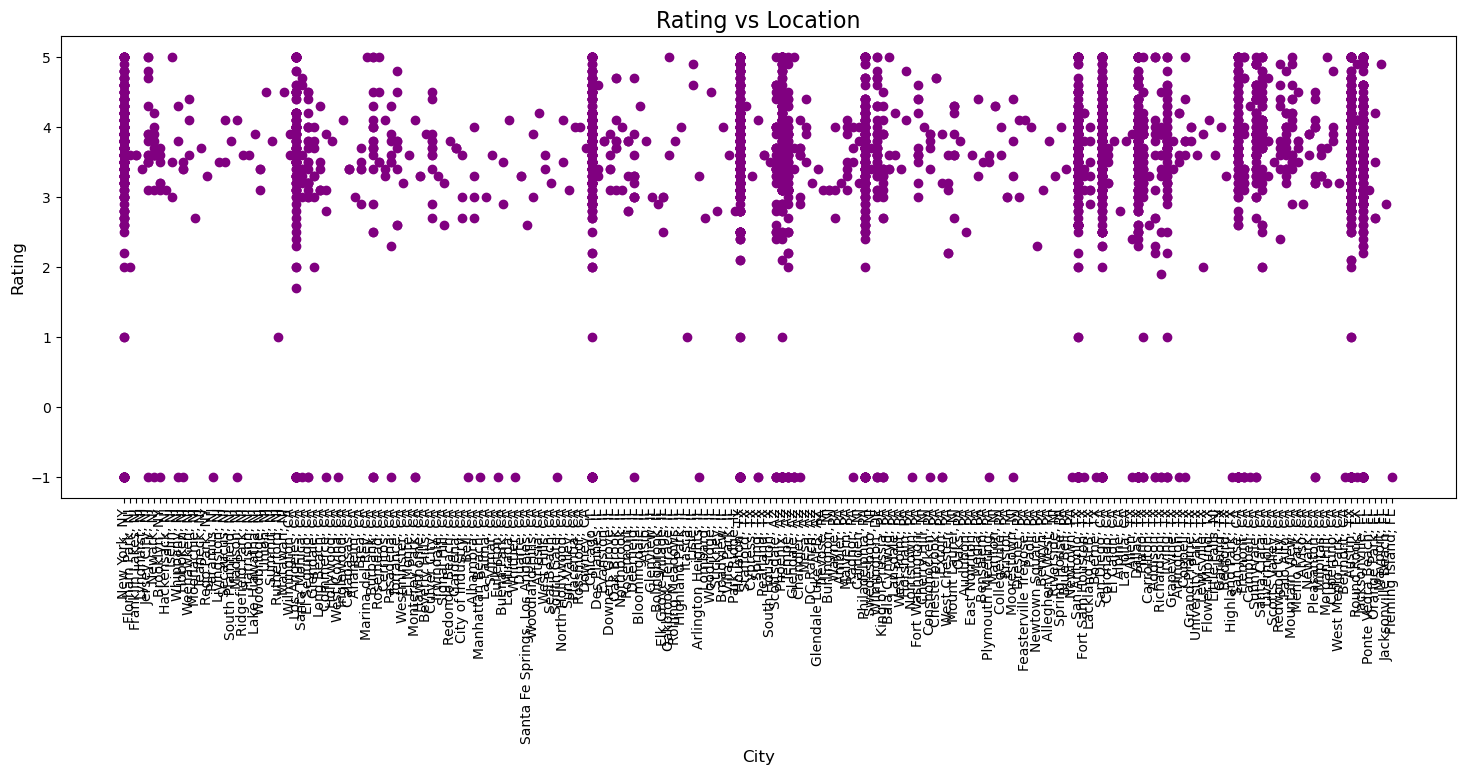

In [45]:
## part 2

plt.figure(figsize=(18, 6))  # Set figure size
plt.scatter(
    business_analyst_data['Expected Salary'],  # X-axis: Expected Salary
    business_analyst_data['Rating']           # Y-axis: Rating
)
plt.title('Rating vs Expected Salary', fontsize=16)  # Set title with a larger font
plt.xlabel('Expected Salary', fontsize=12)           # Label for X-axis
plt.ylabel('Rating', fontsize=12)                    # Label for Y-axis

# 2. Scatter plot: Rating vs Company Size
plt.figure(figsize=(18, 6))
plt.scatter(
    business_analyst_data['Company Size Numeric'],  # X-axis: Company Size (numeric format)
    business_analyst_data['Rating'],                # Y-axis: Rating
    color='g'
)
plt.title('Rating vs Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# 3. Scatter plot: Rating vs City (Location)
plt.figure(figsize=(18, 6))
plt.scatter(
    business_analyst_data['Location'],            # X-axis: Location (City)
    business_analyst_data['Rating'],              # Y-axis: Rating
    color='purple'
)
plt.title('Rating vs Location', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [46]:
## part 3, 4

average_salary = []
for temp in business_analyst_data["Expected Salary"]:
    a = float(temp.split("K")[0][1:])
    b = float(temp.split("K")[1][2:])
    average_salary.append((a+b)/2)

# Calculate correlation for Rating vs Expected Salary
corr_salary, _ = pearsonr(average_salary, business_analyst_data['Rating'])
print(f"Correlation between Rating and Expected Salary: {corr_salary:.2f}")


Correlation between Rating and Expected Salary: 0.04


In [47]:
## part 5

# Function to remove URLs and text containing '/', '.', numbers, '-', or '+'
def clean_text(text):
    # Regular expression pattern to match URLs, words with '/', '.', numbers, '-', or '+'
    pattern = r'http[s]?://\S+|www\.\S+|\S*/\S*|\S*\.\S*|\S*\d+\S*|\S*-+\S*|\S*\+\S*'
    return re.sub(pattern, '', text)

# Function to extract adjectives from a single job description
def extract_adjectives(text):
    # Remove URLs first
    cleaned_text = clean_text(text)
    
    # Tokenize the cleaned text into words
    words = word_tokenize(cleaned_text)
    
    # Perform POS tagging
    tagged_words = pos_tag(words)
    
    # Filter for adjectives (POS tags: JJ, JJR, JJS)
    adjectives = [word for word, pos in tagged_words if pos in ['JJ', 'JJR', 'JJS']]
    
    return adjectives

# Apply the function to each job description and collect all adjectives
all_adjectives = []

for description in business_analyst_data['Job Description']:
    adjectives = extract_adjectives(description)
    all_adjectives.extend(adjectives)

# Remove duplicates (optional)
unique_adjectives = list(set(all_adjectives))

print("Extracted adjectives:\n", unique_adjectives)

Extracted adjectives:
 ['manipulate', 'change', 'intelligent', 'carefree', 'viable', 'travelUS', 'glucose', 'few', 'understandable', 'atmospheric', 'Stellar', 'beloved', 'TOP', 'Material', 'Analytical', 'spend', 'nnJob', 'dive', 'denial', 'participant', 'Experience', 'audited', 'MOST', 'Employee', 'Ellucian', 'Accountable', 'positive', 'theClient', 'witty', 'global', 'Salaried', 'computerized', 'disabled', 'visit', 'Expert', 'forensic', 'whilst', 'reviewed', 'centric', 'QUALIFIED', 'good', 'overhead', 'mid', 'experiment', 'theFederal', 'predictable', 'fast', 'assertive', 'Sustained', 'Exceptional', 'delegated', 'yr', 'patient', 'greater', 'discipline', 'Sustainable', 'hereditary', 'excessive', 'volunteer', 'PJT', 'accommodate', 'countywide', 'minimal', 'described', 'stylish', 'defectbug', 'IAFC', 'oversee', 'deferred', 'Â', 'principlesPersonal', 'unicorn', 'corrective', 'visa', 'ÂUS', 'cross', 'streamlined', 'inÂNew', 'purpose', 'Scrum', 'consultative', 'instrumental', 'Analyzing', 'wr

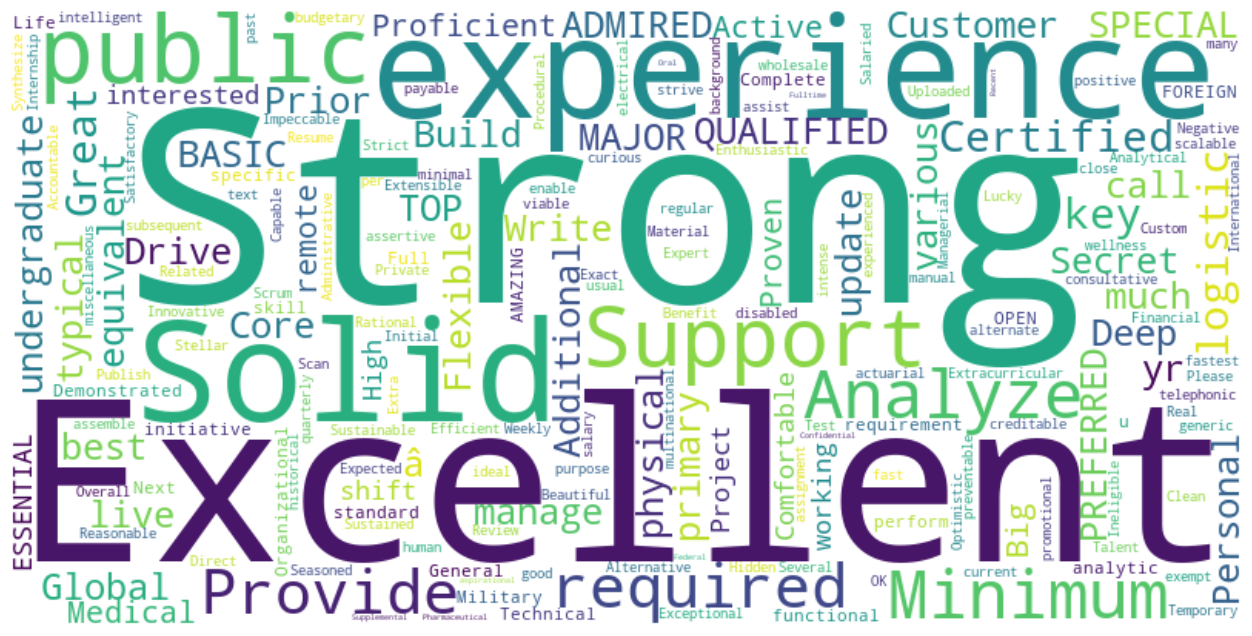

In [48]:
## part 6

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(unique_adjectives))

# Display the word cloud
plt.figure(figsize=(18, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

**Explain your approach and assumptions once this section is completed.**

In the first part I have simply ploted the top 10 most job titles using pie plot to declare.

In the second part I have ploted the rating vs salary, location and company size which it is obvious there is no corelation between them and there is no linear regression.

In the third and fouth part I have simply found the correlation between them.

In the 5'th part I have got the adjectives and removed some none-sence words.

In the 6'th part I have created an image using those words which was extremely beautiful.

# 4. Covid in the US
In this question, you are required to reproduce the graphs shown in a real journalistic article. After all, reproducibility is an important part of professional journalism as well as data science. Also, a great deal of a data scientist's work is to communicate data in a way that anyone with any level of expertise in the field would understand.

You should reproduce the 4 graphs shown in <a href="https://projects.fivethirtyeight.com/coronavirus-polls/"> this article</a>. The data is openly accessible through <a href="https://github.com/fivethirtyeight/covid-19-polls/"> FiveThirtyEight's github</a>. Nevertheless, both the data and the article are available in `data` folder in case of unstable internet connections!

*Note: Your graphs don't have to be as interactive or detailed as the ones on the website. Only showing the averages, some (not all) data points with light color, legends, titles, x values, and y values are necessary.*

### Loading Data

In [32]:
approval_covid_df = pd.read_csv("data\Q4\covid\covid-19-polls-master\covid_approval_polls.csv")
## convert str to time
approval_covid_df['start_date'] = pd.to_datetime(approval_covid_df['start_date'])

approval_covid_df

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
0,2020-02-02,2020-02-04,YouGov,Economist,1500.0,a,all,Trump,FALSE,Do you approve or disapprove of Donald Trump’s...,42.0,29.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
1,2020-02-02,2020-02-04,YouGov,Economist,376.0,a,R,Trump,FALSE,Do you approve or disapprove of Donald Trump’s...,75.0,6.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
2,2020-02-02,2020-02-04,YouGov,Economist,523.0,a,D,Trump,FALSE,Do you approve or disapprove of Donald Trump’s...,21.0,51.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
3,2020-02-02,2020-02-04,YouGov,Economist,599.0,a,I,Trump,FALSE,Do you approve or disapprove of Donald Trump’s...,39.0,25.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
4,2020-02-07,2020-02-09,Morning Consult,NaN,2200.0,a,all,Trump,FALSE,Do you approve or disapprove of the job each o...,57.0,22.0,https://morningconsult.com/wp-content/uploads/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,2022-09-14,2022-09-15,Redfield & Wilton Strategies,NaN,311.0,rv,I,Biden,FALSE,"To what extent, if at all, do you approve or d...",30.0,35.0,https://view.officeapps.live.com/op/view.aspx?...
3785,2022-09-16,2022-09-19,Echelon Insights,NaN,1056.0,lv,all,Biden,FALSE,Do you approve or disapprove of how Joe Biden ...,51.0,43.0,http://echeloninsights.com/wp-content/uploads/...
3786,2022-09-16,2022-09-19,Echelon Insights,NaN,389.0,lv,R,Biden,FALSE,Do you approve or disapprove of how Joe Biden ...,17.0,76.0,http://echeloninsights.com/wp-content/uploads/...
3787,2022-09-16,2022-09-19,Echelon Insights,NaN,436.0,lv,D,Biden,FALSE,Do you approve or disapprove of how Joe Biden ...,85.0,10.0,http://echeloninsights.com/wp-content/uploads/...


### Trump Vs. Biden Approval/Disapproval

#### Trump:

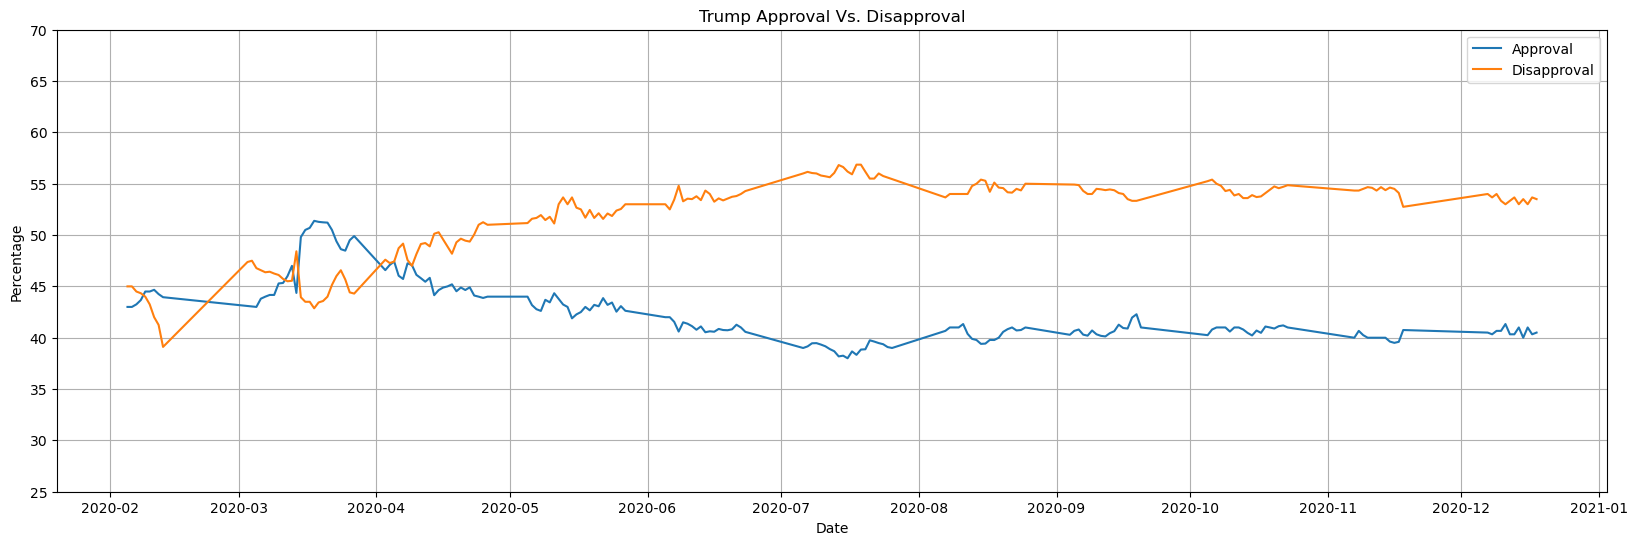

In [33]:
# Filter and process approval ratings for Trump
trump_approve = (approval_covid_df [(approval_covid_df['subject'] == 'Trump')] [['start_date', 'approve']] )

# Extract day, month, and year for further processing
trump_approve['day'] = trump_approve['start_date'].dt.day
trump_approve['month'] = trump_approve['start_date'].dt.month
trump_approve['year'] = trump_approve['start_date'].dt.year

# Calculate rolling mean with a window of 50 and convert to integer
trump_approve = np.floor(trump_approve.rolling(50).mean().dropna()).astype(int)

# Reconstruct the 'start_date' column and sort by date
trump_approve['start_date'] = pd.to_datetime(
    trump_approve['month'].astype(str) + "-" +
    trump_approve['day'].astype(str) + "-" +
    trump_approve['year'].astype(str)
)
trump_approve.sort_values('start_date', ascending=True, inplace=True)

# Repeat the same process for disapproval ratings
trump_disapprove = (approval_covid_df [(approval_covid_df['subject'] == 'Trump')] [['start_date', 'disapprove']])

trump_disapprove['day'] = trump_disapprove['start_date'].dt.day
trump_disapprove['month'] = trump_disapprove['start_date'].dt.month
trump_disapprove['year'] = trump_disapprove['start_date'].dt.year

trump_disapprove = np.floor(trump_disapprove.rolling(50).mean().dropna()).astype(int)
trump_disapprove['start_date'] = pd.to_datetime(
    trump_disapprove['month'].astype(str) + "-" +
    trump_disapprove['day'].astype(str) + "-" +
    trump_disapprove['year'].astype(str)
)
trump_disapprove.sort_values('start_date', ascending=True, inplace=True)

# Group data by 'start_date' for plotting
dates = trump_approve.groupby('start_date')['start_date'].first()
approved = trump_approve.groupby('start_date')['approve'].mean()

dates1 = trump_disapprove.groupby('start_date')['start_date'].first()
disapproved = trump_disapprove.groupby('start_date')['disapprove'].mean()

# Plotting
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.ylim((25, 70))

plt.plot(dates, approved, label='Approval')
plt.plot(dates1, disapproved, label='Disapproval')

plt.title('Trump Approval Vs. Disapproval')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

#### Biden

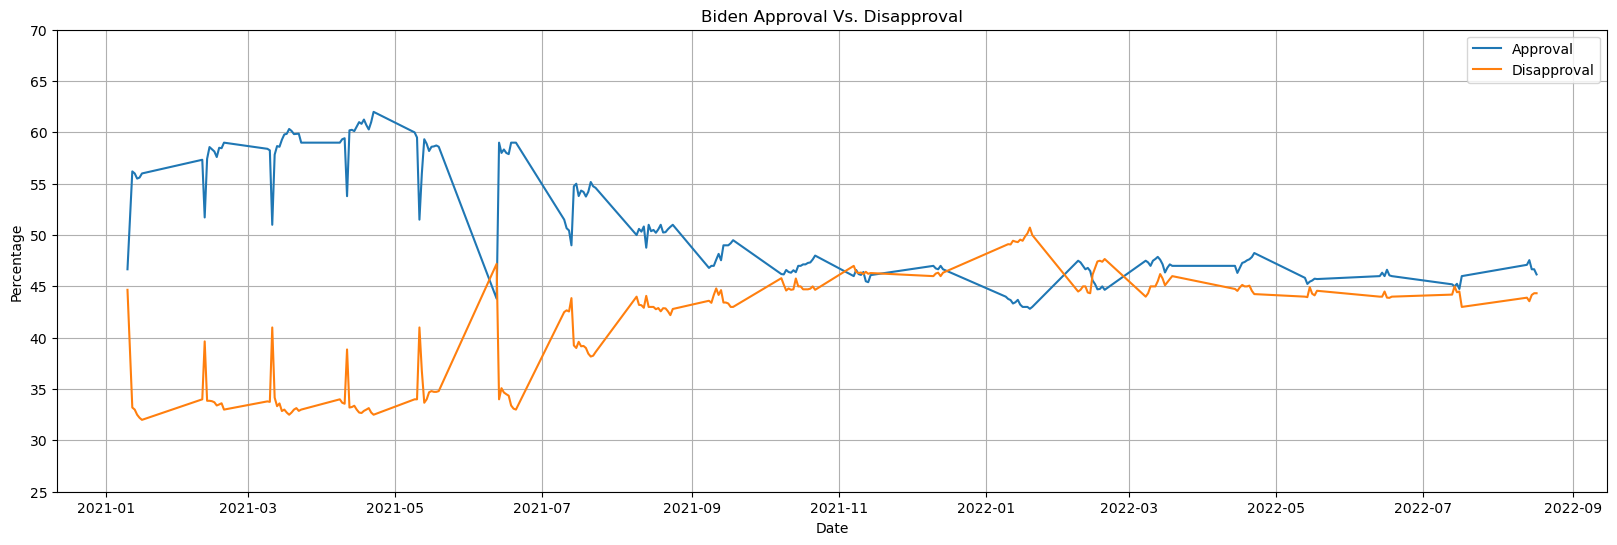

In [34]:
# Filter and process approval ratings for Biden
biden_approve = (approval_covid_df [(approval_covid_df['subject'] == 'Biden')] [['start_date', 'approve']])

# Extract day, month, and year for further processing
biden_approve['day'] = biden_approve['start_date'].dt.day
biden_approve['month'] = biden_approve['start_date'].dt.month
biden_approve['year'] = biden_approve['start_date'].dt.year

# Calculate rolling mean with a window of 50 and convert to integer
biden_approve = np.floor(biden_approve.rolling(50).mean().dropna()).astype(int)

# Reconstruct the 'start_date' column and sort by date
biden_approve['start_date'] = pd.to_datetime(
    biden_approve['month'].astype(str) + "-" +
    biden_approve['day'].astype(str) + "-" +
    biden_approve['year'].astype(str)
)
biden_approve.sort_values('start_date', ascending=True, inplace=True)

# Repeat the same process for disapproval ratings
biden_disapprove = (approval_covid_df [(approval_covid_df['subject'] == 'Biden')] [['start_date', 'disapprove']])

biden_disapprove['day'] = biden_disapprove['start_date'].dt.day
biden_disapprove['month'] = biden_disapprove['start_date'].dt.month
biden_disapprove['year'] = biden_disapprove['start_date'].dt.year


biden_disapprove = np.floor(biden_disapprove.rolling(50).mean().dropna()).astype(int)
biden_disapprove['start_date'] = pd.to_datetime(
    biden_disapprove['month'].astype(str) + "-" +
    biden_disapprove['day'].astype(str) + "-" +
    biden_disapprove['year'].astype(str)
)
biden_disapprove.sort_values('start_date', ascending=True, inplace=True)

# Group data by 'start_date' for plotting
dates = biden_approve.groupby('start_date')['start_date'].first()
approved = biden_approve.groupby('start_date')['approve'].mean()

dates1 = biden_disapprove.groupby('start_date')['start_date'].first()
disapproved = biden_disapprove.groupby('start_date')['disapprove'].mean()

# Plotting
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.ylim((25, 70))

plt.plot(dates, approved, label='Approval')
plt.plot(dates1, disapproved, label='Disapproval')

plt.title('Biden Approval Vs. Disapproval')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

### Trump Vs. Biden Approval Departments

#### Trump

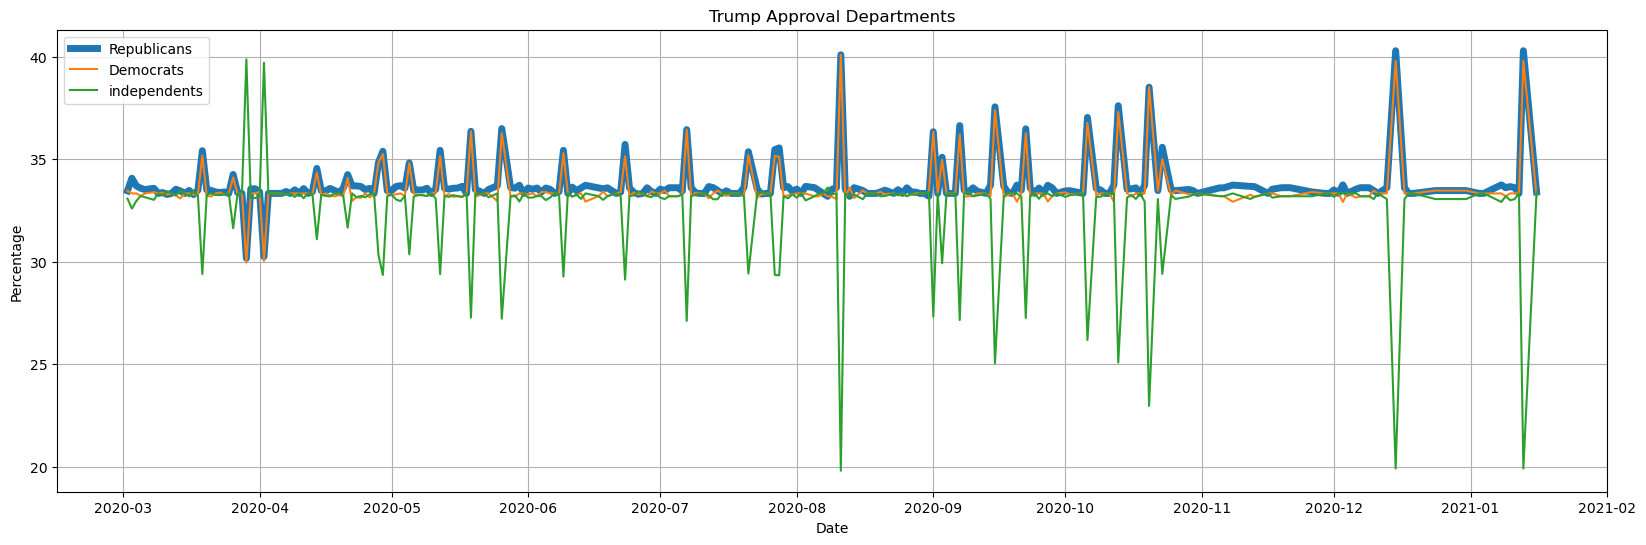

In [35]:
# Filter and process approval ratings for Trump
trump_approve_dep = (approval_covid_df [(approval_covid_df['subject'] == 'Trump')] [['start_date', 'party','approve']] )

# Extract day, month, and year for further processing
trump_approve_dep['day'] = trump_approve_dep['start_date'].dt.day
trump_approve_dep['month'] = trump_approve_dep['start_date'].dt.month
trump_approve_dep['year'] = trump_approve_dep['start_date'].dt.year

# Calculate rolling mean with a window of 50 and convert to integer
trump_approve_dep['approve'] = trump_approve_dep['approve'].rolling(50).mean()
trump_approve_dep.dropna(inplace=True)
trump_approve_dep['approve'] = np.floor(trump_approve_dep['approve']).astype(int)

trump_approve_dep['R'] = np.where((trump_approve_dep['party'] == 'R') | (trump_approve_dep['party'] == 'all'),trump_approve_dep['approve'].astype(int),0)
trump_approve_dep['D'] = np.where((trump_approve_dep['party'] == 'D') | (trump_approve_dep['party'] == 'all'),trump_approve_dep['approve'].astype(int),0)
trump_approve_dep['I'] = np.where((trump_approve_dep['party'] == 'I') | (trump_approve_dep['party'] == 'all'),trump_approve_dep['approve'].astype(int),0)

# Reconstruct the 'start_date' column and sort by date
trump_approve_dep['start_date'] = pd.to_datetime(
    trump_approve_dep['month'].astype(str) + "-" +
    trump_approve_dep['day'].astype(str) + "-" +
    trump_approve_dep['year'].astype(str)
)

trump_approve_dep.sort_values('start_date', ascending=True, inplace=True)

dates = trump_approve_dep.groupby('start_date')['start_date'].first()
r_num = trump_approve_dep.groupby('start_date')['R'].mean()
d_num = trump_approve_dep.groupby('start_date')['D'].mean()
i_num = trump_approve_dep.groupby('start_date')['I'].mean()

# Plotting
plt.figure(figsize=(20, 6))
plt.grid(True)

plt.plot(dates, 100*r_num/(r_num+d_num+i_num), label='Republicans',linewidth=5)
plt.plot(dates, 100*d_num/(r_num+d_num+i_num), label='Democrats')
plt.plot(dates, 100*i_num/(r_num+d_num+i_num), label='independents')

plt.title('Trump Approval Departments')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

#### Biden

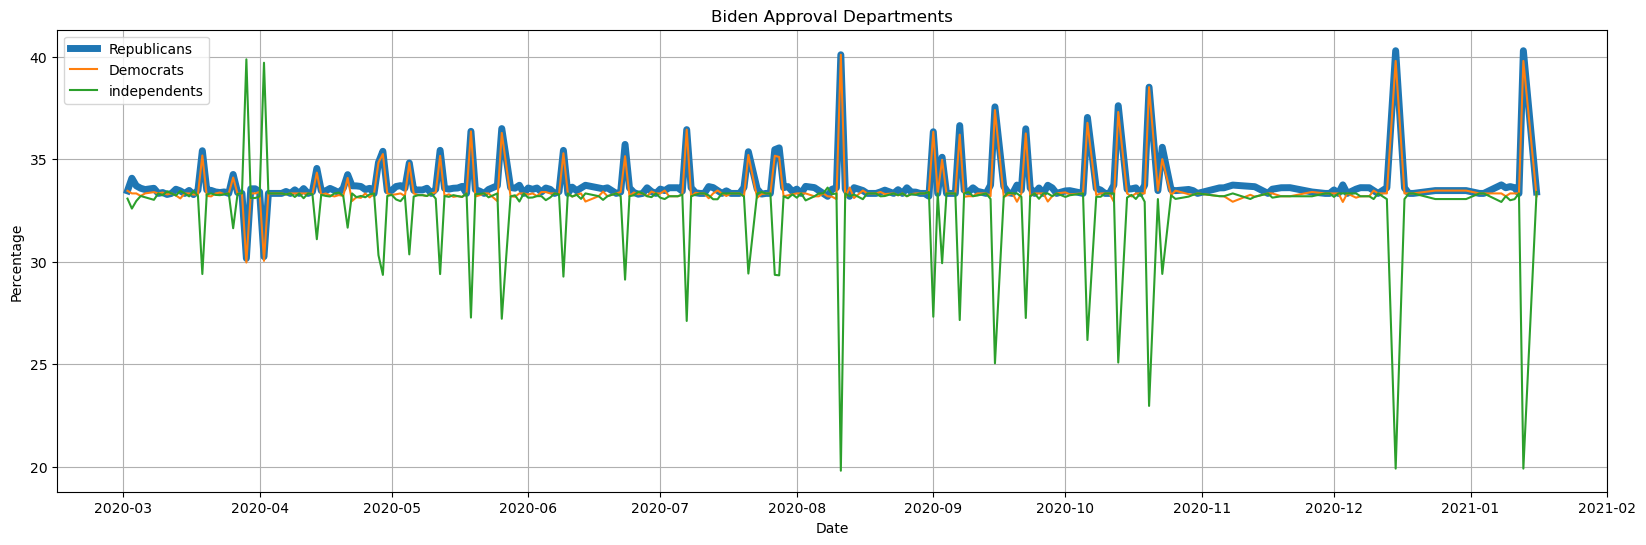

In [36]:
# Filter and process approval ratings for Trump
biden_approve_dep = (approval_covid_df [(approval_covid_df['subject'] == 'Trump')] [['start_date', 'party','approve']] )

# Extract day, month, and year for further processing
biden_approve_dep['day'] = biden_approve_dep['start_date'].dt.day
biden_approve_dep['month'] = biden_approve_dep['start_date'].dt.month
biden_approve_dep['year'] = biden_approve_dep['start_date'].dt.year

# Calculate rolling mean with a window of 50 and convert to integer
biden_approve_dep['approve'] = biden_approve_dep['approve'].rolling(50).mean()
biden_approve_dep.dropna(inplace=True)
biden_approve_dep['approve'] = np.floor(biden_approve_dep['approve']).astype(int)

biden_approve_dep['R'] = np.where((biden_approve_dep['party'] == 'R') | (biden_approve_dep['party'] == 'all'),biden_approve_dep['approve'].astype(int),0)
biden_approve_dep['D'] = np.where((biden_approve_dep['party'] == 'D') | (biden_approve_dep['party'] == 'all'),biden_approve_dep['approve'].astype(int),0)
biden_approve_dep['I'] = np.where((biden_approve_dep['party'] == 'I') | (biden_approve_dep['party'] == 'all'),biden_approve_dep['approve'].astype(int),0)

# Reconstruct the 'start_date' column and sort by date
biden_approve_dep['start_date'] = pd.to_datetime(
    biden_approve_dep['month'].astype(str) + "-" +
    biden_approve_dep['day'].astype(str) + "-" +
    biden_approve_dep['year'].astype(str)
)

biden_approve_dep.sort_values('start_date', ascending=True, inplace=True)

dates = biden_approve_dep.groupby('start_date')['start_date'].first()
r_num = biden_approve_dep.groupby('start_date')['R'].mean()
d_num = biden_approve_dep.groupby('start_date')['D'].mean()
i_num = biden_approve_dep.groupby('start_date')['I'].mean()

# Plotting
plt.figure(figsize=(20, 6))
plt.grid(True)

plt.plot(dates, 100*r_num/(r_num+d_num+i_num), label='Republicans',linewidth=5)
plt.plot(dates, 100*d_num/(r_num+d_num+i_num), label='Democrats')
plt.plot(dates, 100*i_num/(r_num+d_num+i_num), label='independents')

plt.title('Biden Approval Departments')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

**Explain your approach and assumptions once this section is completed.**

In this question I have simply collected number of approvals for each candidates and simply ploted them by time.